In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import KFold

import gc
import os
from numpy import mean
from numpy import std

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [126]:
meta_train = pd.read_pickle('../input/taiwancd/meta_train.pkl')
meta_test = pd.read_pickle('../input/taiwancd/meta_test.pkl')

y_train = pd.read_pickle('../input/taiwancd/y_train.pkl')
y_test = pd.read_pickle('../input/taiwancd/y_test.pkl')

In [127]:
n_fold = 5

In [128]:
########### Stacking level 1 ###############

In [129]:
##### LightGBM #######

In [130]:
stacking_lv1_lgb = LGBMClassifier(
                boosting_type='gbdt',
                max_depth=10,
                learning_rate=0.05,
                n_estimators=450,
                objective = 'binary',
                random_state=42
)

In [131]:
kf = KFold(n_splits=n_fold, shuffle = False)
acc_score_stacking_lv1_lgb = []
auc_score_stacking_lv1_lgb = []
f1_stacking_lv1_lgb = []
meta_train_stacking_lv1_lgb = []
meta_test_stacking_lv1_lgb = []
i = 1
for train_index, valid_index in kf.split(meta_train, y_train):
    print('KFold {} of {}'.format(i,kf.n_splits))
    train_X, val_X = meta_train.iloc[train_index], meta_train.iloc[valid_index]
    train_y, val_y = y_train.iloc[train_index], y_train.iloc[valid_index]
    stacking_lv1_lgb.fit(train_X, train_y, eval_set=[(val_X, val_y)], early_stopping_rounds=200, verbose = 0)
    ####meta
    meta_train_stacking_lv1_lgb = np.append(meta_train_stacking_lv1_lgb, stacking_lv1_lgb.predict_proba(val_X)[:,1]).reshape(-1,1)
    
    if len(meta_test_stacking_lv1_lgb) == 0:
        meta_test_stacking_lv1_lgb = stacking_lv1_lgb.predict_proba(meta_test)[:,1].reshape(-1,1)
    else:
        meta_test_stacking_lv1_lgb = np.add(meta_test_stacking_lv1_lgb, stacking_lv1_lgb.predict_proba(meta_test)[:,1].reshape(-1,1))
    #####
    yhat = stacking_lv1_lgb.predict(meta_test)
    acc_score_stacking_lv1_lgb.append(accuracy_score(yhat,y_test))
    auc_score_stacking_lv1_lgb.append(roc_auc_score(yhat,y_test))
    f1_stacking_lv1_lgb.append(f1_score(yhat,y_test))
    i += 1
meta_test_stacking_lv1_lgb = np.divide(meta_test_stacking_lv1_lgb, n_fold)

KFold 1 of 5


/opt/conda/lib/python3.7/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/conda/lib/python3.7/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


KFold 2 of 5


/opt/conda/lib/python3.7/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/conda/lib/python3.7/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


KFold 3 of 5


/opt/conda/lib/python3.7/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/conda/lib/python3.7/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


KFold 4 of 5


/opt/conda/lib/python3.7/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/conda/lib/python3.7/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


KFold 5 of 5


/opt/conda/lib/python3.7/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/conda/lib/python3.7/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Accuracy: 0.8959412780656304 +- 0.006048330854764166
ROC-AUC: 0.896083053628917 +- 0.006101694808466096
F1-Score: 0.8950364275710856 +- 0.005881993549202993
              precision    recall  f1-score   support

           0       0.90      0.91      0.90      3474
           1       0.91      0.90      0.90      3474

    accuracy                           0.90      6948
   macro avg       0.90      0.90      0.90      6948
weighted avg       0.90      0.90      0.90      6948



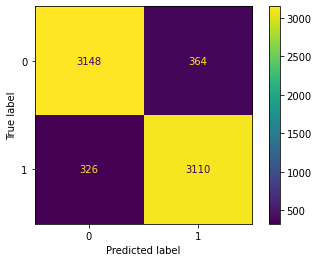

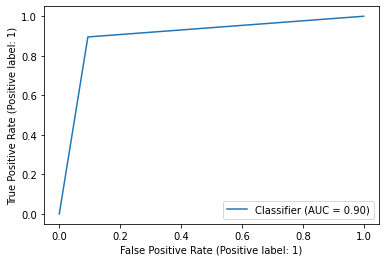

In [132]:
yhat = stacking_lv1_lgb.predict(meta_test)
print("Accuracy: " + str(mean(acc_score_stacking_lv1_lgb)) + " +- "+ str(std(acc_score_stacking_lv1_lgb)))
print("ROC-AUC: " + str(mean(auc_score_stacking_lv1_lgb)) + " +- " + str(std(auc_score_stacking_lv1_lgb)))
print("F1-Score: " + str(mean(f1_stacking_lv1_lgb)) +" +- "+ str(std(f1_stacking_lv1_lgb)))
print(classification_report(y_test, yhat))
cm = confusion_matrix(yhat, y_test,labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot()
RocCurveDisplay.from_predictions(y_test, yhat)
plt.show()

In [133]:
gc.collect()

24232

In [134]:
####### XGBoost #########

In [135]:
stacking_lv1_gbdt  = GradientBoostingClassifier(n_estimators=438,
                                  learning_rate=0.06,
                                  max_depth=10,
                                  subsample = 0.55,
                                  verbose = 1,
                                  random_state=0)

In [137]:
kf = KFold(n_splits=n_fold, shuffle = False)
acc_score_stacking_lv1_gbdt = []
auc_score_stacking_lv1_gbdt = []
f1_stacking_lv1_gbdt = []
meta_train_stacking_lv1_gbdt = []
meta_test_stacking_lv1_gbdt = []
i = 1
for train_index, valid_index in kf.split(meta_train, y_train):
    print('KFold {} of {}'.format(i,kf.n_splits))
    train_X, val_X = meta_train.iloc[train_index], meta_train.iloc[valid_index]
    train_y, val_y = y_train.iloc[train_index], y_train.iloc[valid_index]
    stacking_lv1_gbdt.fit(train_X, train_y)
    ####meta
    meta_train_stacking_lv1_gbdt = np.append(meta_train_stacking_lv1_gbdt, stacking_lv1_gbdt.predict_proba(val_X)[:,1]).reshape(-1,1)
    
    if len(meta_test_stacking_lv1_gbdt) == 0:
        meta_test_stacking_lv1_gbdt = stacking_lv1_gbdt.predict_proba(meta_test)[:,1].reshape(-1,1)
    else:
        meta_test_stacking_lv1_gbdt = np.add(meta_test_stacking_lv1_gbdt, stacking_lv1_gbdt.predict_proba(meta_test)[:,1].reshape(-1,1))
    #####
    yhat = stacking_lv1_gbdt.predict(meta_test)
    acc_score_stacking_lv1_gbdt.append(accuracy_score(yhat,y_test))
    auc_score_stacking_lv1_gbdt.append(roc_auc_score(yhat,y_test))
    f1_stacking_lv1_gbdt.append(f1_score(yhat,y_test))
    i += 1
meta_test_stacking_lv1_gbdt = np.divide(meta_test_stacking_lv1_gbdt, n_fold)

KFold 1 of 5
      Iter       Train Loss      OOB Improve   Remaining Time 
         1           1.2798           0.0970            1.75m
         2           1.1879           0.0853            1.83m
         3           1.1073           0.0766            1.79m
         4           1.0327           0.0698            1.82m
         5           0.9640           0.0616            1.85m
         6           0.9044           0.0556            1.85m
         7           0.8510           0.0506            1.85m
         8           0.8021           0.0465            1.86m
         9           0.7548           0.0422            1.86m
        10           0.7114           0.0389            1.86m
        20           0.4313           0.0173            2.01m
        30           0.2891           0.0080            1.96m
        40           0.2142           0.0040            1.86m
        50           0.1686           0.0022            1.79m
        60           0.1409           0.0008            

Accuracy: 0.8944156591824985 +- 0.004522676747509889
ROC-AUC: 0.8944586411691802 +- 0.004548400535433967
F1-Score: 0.8940991804012649 +- 0.004189798219122995
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      3474
           1       0.90      0.90      0.90      3474

    accuracy                           0.90      6948
   macro avg       0.90      0.90      0.90      6948
weighted avg       0.90      0.90      0.90      6948



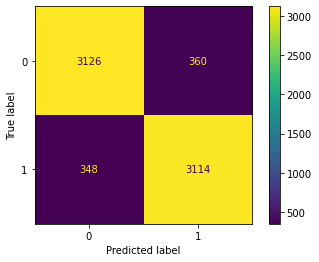

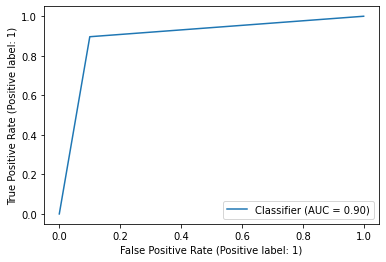

In [138]:
yhat = stacking_lv1_gbdt.predict(meta_test)
print("Accuracy: " + str(mean(acc_score_stacking_lv1_gbdt)) + " +- "+ str(std(acc_score_stacking_lv1_gbdt)))
print("ROC-AUC: " + str(mean(auc_score_stacking_lv1_gbdt)) + " +- " + str(std(auc_score_stacking_lv1_gbdt)))
print("F1-Score: " + str(mean(f1_stacking_lv1_gbdt)) +" +- "+ str(std(f1_stacking_lv1_gbdt)))
print(classification_report(y_test, yhat))
cm = confusion_matrix(yhat, y_test,labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot()
RocCurveDisplay.from_predictions(y_test, yhat)
plt.show()

In [139]:
gc.collect()

8043

In [140]:
######### Stacking level 2 ##########

In [141]:
meta_train_lv1 = pd.concat([#meta_train,
                          pd.DataFrame(stacking_lv1_lgb.predict_proba(meta_train)[:,1].reshape(-1,1), columns=['lv1_lgb_train']),
                       pd.DataFrame(stacking_lv1_gbdt.predict_proba(meta_train)[:,1].reshape(-1,1), columns=['lv1_gbdt_train']),
                        ], axis = 1)

In [142]:
meta_test_lv1 = pd.concat([#meta_test,
                           pd.DataFrame(stacking_lv1_lgb.predict_proba(meta_test)[:,1].reshape(-1,1), columns=['lv1_lgb_test']),
                       pd.DataFrame(stacking_lv1_gbdt.predict_proba(meta_test)[:,1].reshape(-1,1), columns=['lv1_gbdt_test']),
                        ], axis = 1)

In [143]:
meta_train_lv1

,lv1_lgb_train,lv1_gbdt_train
0,0.006166,0.000678
1,0.998518,0.999648
2,0.998147,0.999802
3,0.004279,0.000429
4,0.010065,0.000836
...,...,...
27785,0.055679,0.003267
27786,0.907851,0.994399
27787,0.997265,0.999706
27788,0.924220,0.993811


In [144]:
meta_test_lv1

,lv1_lgb_test,lv1_gbdt_test
0,0.003977,0.000713
1,0.985764,0.999247
2,0.087055,0.006422
3,0.994307,0.999544
4,0.222614,0.081031
...,...,...
6943,0.811394,0.788929
6944,0.002989,0.001559
6945,0.550794,0.628439
6946,0.999907,0.999838


In [145]:
######### Final predictor #########

In [146]:
###### LogisticRegression #######

In [147]:
stacking_lv2_lr = LogisticRegression(random_state=0)

In [148]:
kf = KFold(n_splits=n_fold, shuffle = False)
acc_score_stacking_lv2_lr = []
auc_score_stacking_lv2_lr = []
f1_stacking_lv2_lr = []
meta_train_stacking_lv2_lr = []
meta_test_stacking_lv2_lr = []
i = 1
for train_index, valid_index in kf.split(meta_train_lv1, y_train):
    print('KFold {} of {}'.format(i,kf.n_splits))
    train_X, val_X = meta_train_lv1.iloc[train_index], meta_train_lv1.iloc[valid_index]
    train_y, val_y = y_train.iloc[train_index], y_train.iloc[valid_index]
    stacking_lv2_lr.fit(train_X, train_y)
    ####meta
    meta_train_stacking_lv2_lr = np.append(meta_train_stacking_lv2_lr, stacking_lv2_lr.predict_proba(val_X)[:,1]).reshape(-1,1)
    
    if len(meta_test_stacking_lv2_lr) == 0:
        meta_test_stacking_lv2_lr = stacking_lv2_lr.predict_proba(meta_test_lv1)[:,1].reshape(-1,1)
    else:
        meta_test_stacking_lv2_lr = np.add(meta_test_stacking_lv2_lr, stacking_lv2_lr.predict_proba(meta_test_lv1)[:,1].reshape(-1,1))
    #####
    yhat = stacking_lv2_lr.predict(meta_test_lv1)
    acc_score_stacking_lv2_lr.append(accuracy_score(yhat,y_test))
    auc_score_stacking_lv2_lr.append(roc_auc_score(yhat,y_test))
    f1_stacking_lv2_lr.append(f1_score(yhat,y_test))
    i += 1
meta_test_stacking_lv2_lr = np.divide(meta_test_stacking_lv2_lr, n_fold)

KFold 1 of 5
KFold 2 of 5
KFold 3 of 5
KFold 4 of 5
KFold 5 of 5


Accuracy: 0.8992515831894069 +- 0.00022296968026526176
ROC-AUC: 0.8992535149379444 +- 0.00022256104502270196
F1-Score: 0.8991412336144753 +- 0.0002345184746122187
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      3474
           1       0.90      0.90      0.90      3474

    accuracy                           0.90      6948
   macro avg       0.90      0.90      0.90      6948
weighted avg       0.90      0.90      0.90      6948



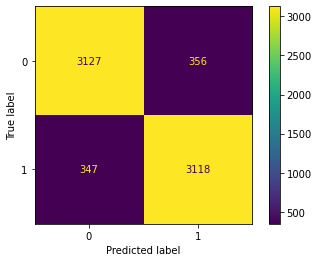

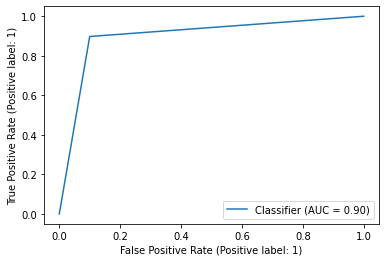

In [149]:
yhat = stacking_lv2_lr.predict(meta_test_lv1)
print("Accuracy: " + str(mean(acc_score_stacking_lv2_lr)) + " +- "+ str(std(acc_score_stacking_lv2_lr)))
print("ROC-AUC: " + str(mean(auc_score_stacking_lv2_lr)) + " +- " + str(std(auc_score_stacking_lv2_lr)))
print("F1-Score: " + str(mean(f1_stacking_lv2_lr)) +" +- "+ str(std(f1_stacking_lv2_lr)))
print(classification_report(y_test, yhat))
cm = confusion_matrix(yhat, y_test,labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot()
RocCurveDisplay.from_predictions(y_test, yhat)
plt.show()